In [243]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math

np.random.seed(seed=4)

def show_data(mu, sigma, data=None):
    x = np.arange(0, 150, 0.001)
    y = norm.pdf(x,mu,sigma)

    fig, ax = plt.subplots(figsize=(9,6))
    ax.plot(x,y)
    if data is not None:
        plt.scatter(data, [0]*len(data))

    plt.style.use('fivethirtyeight')
    plt.show()


In [244]:
data = np.random.normal(loc=63, scale=9, size=[40]).astype(int)
data.mean(), data.std()

(62.95, 9.251891698458213)

In [245]:
priori = 48, 20*20
f"Let's asume a priori: mean {priori[0]} bps with standard deviation {math.sqrt(priori[1])}"

"Let's asume a priori: mean 48 bps with standard deviation 20.0"

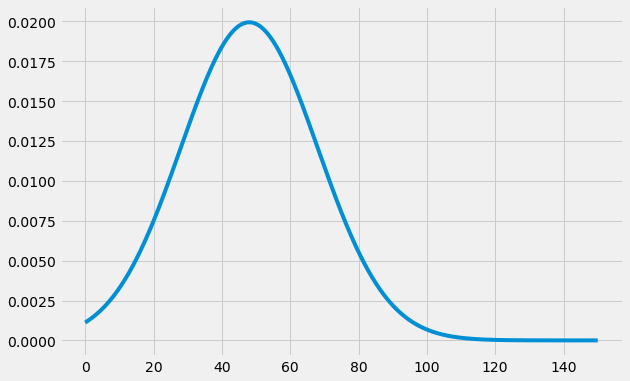

In [246]:
show_data(mu=priori[0], sigma=math.sqrt(priori[1]))

In [247]:
data

array([63, 67, 54, 69, 59, 48, 57, 68, 65, 52, 68, 62, 66, 65, 52, 66, 57,
       76, 69, 63, 54, 63, 64, 52, 83, 66, 78, 52, 77, 50, 57, 67, 63, 41,
       53, 70, 81, 71, 60, 70])

Update rule from <BR>
https://www.bzarg.com/p/how-a-kalman-filter-works-in-pictures/#mjx-eqn-gainformula <br>
![title](img/update_rules.png)

In [248]:
def update(data, priori):
    priori_mu, priori_sigma = priori
    k = priori_sigma/(priori_sigma+data.var())
    post_mu = priori_mu + k*(data.mean()-priori_mu) 
    post_sigma=priori_sigma-k*data.var()
    return post_mu, post_sigma
post=update(data, priori)
post[0], math.sqrt(post[1])

(60.31472567301109, 18.151886621138065)

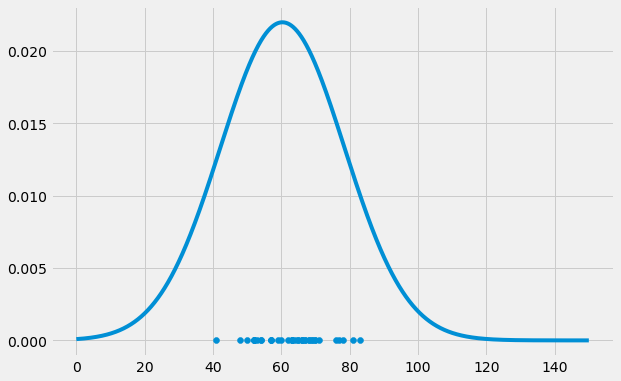

In [249]:
show_data(mu=post[0], sigma=math.sqrt(post[1]), data=data)

In [118]:
data

array([92.7433141 , 58.55680628, 59.05200328, 88.39514043, 38.34919756,
       27.55057445])